# Airplane Accident Severity Prediction

**Importing the libraries**

In [164]:
import pandas as pd                             #Importing pandas for data analysis
import numpy as np                               #Importing numpy for working with multidimensional arrays
import matplotlib.pyplot as plt                         #Importing matplotlib for visualisation
import seaborn as sns                               #Importing seaborn for visualisation
from sklearn.model_selection import train_test_split            #Importing the train_test_split function from sklearn.model_selection library
from sklearn.preprocessing import StandardScaler              #Importing StandardScaler function from sklearn.preprocessing module
import lightgbm as ltb                                  #Importing lightgbm library
from sklearn.metrics import confusion_matrix, accuracy_score        #Importing the confusion matrix and accuracy_score methods from sklearn.metrics library
from sklearn.model_selection import cross_val_score               #Importing the k-fold cross validation method from sklearn.model_selection library

**Importing the dataset**

In [165]:
airplane_data= pd.read_csv('AirplaneAccident.csv')

**Checking total number of null values in each column**

In [166]:
airplane_data.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

**Categorized the 'Severity' column and stored the data in a new column 'New_severity'**

In [167]:
airplane_data['New_severity']=airplane_data['Severity'].map({'Highly_Fatal_And_Damaging':0,'Significant_Damage_And_Serious_Injuries':1,'Minor_Damage_And_Injuries':2,'Significant_Damage_And_Fatalities':3})

**Removed the 'Severity' column**

In [168]:
airplane_data.drop('Severity', 1, inplace= True)

**Displaying the first 5 rows of the dataset**

In [169]:
airplane_data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,New_severity
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570,2
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128,2
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181,3
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946,1
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054,3


**Using pairplot to visualise the relationship among the features (independent variables) with the dependent variable i.e. 'New_severity'**

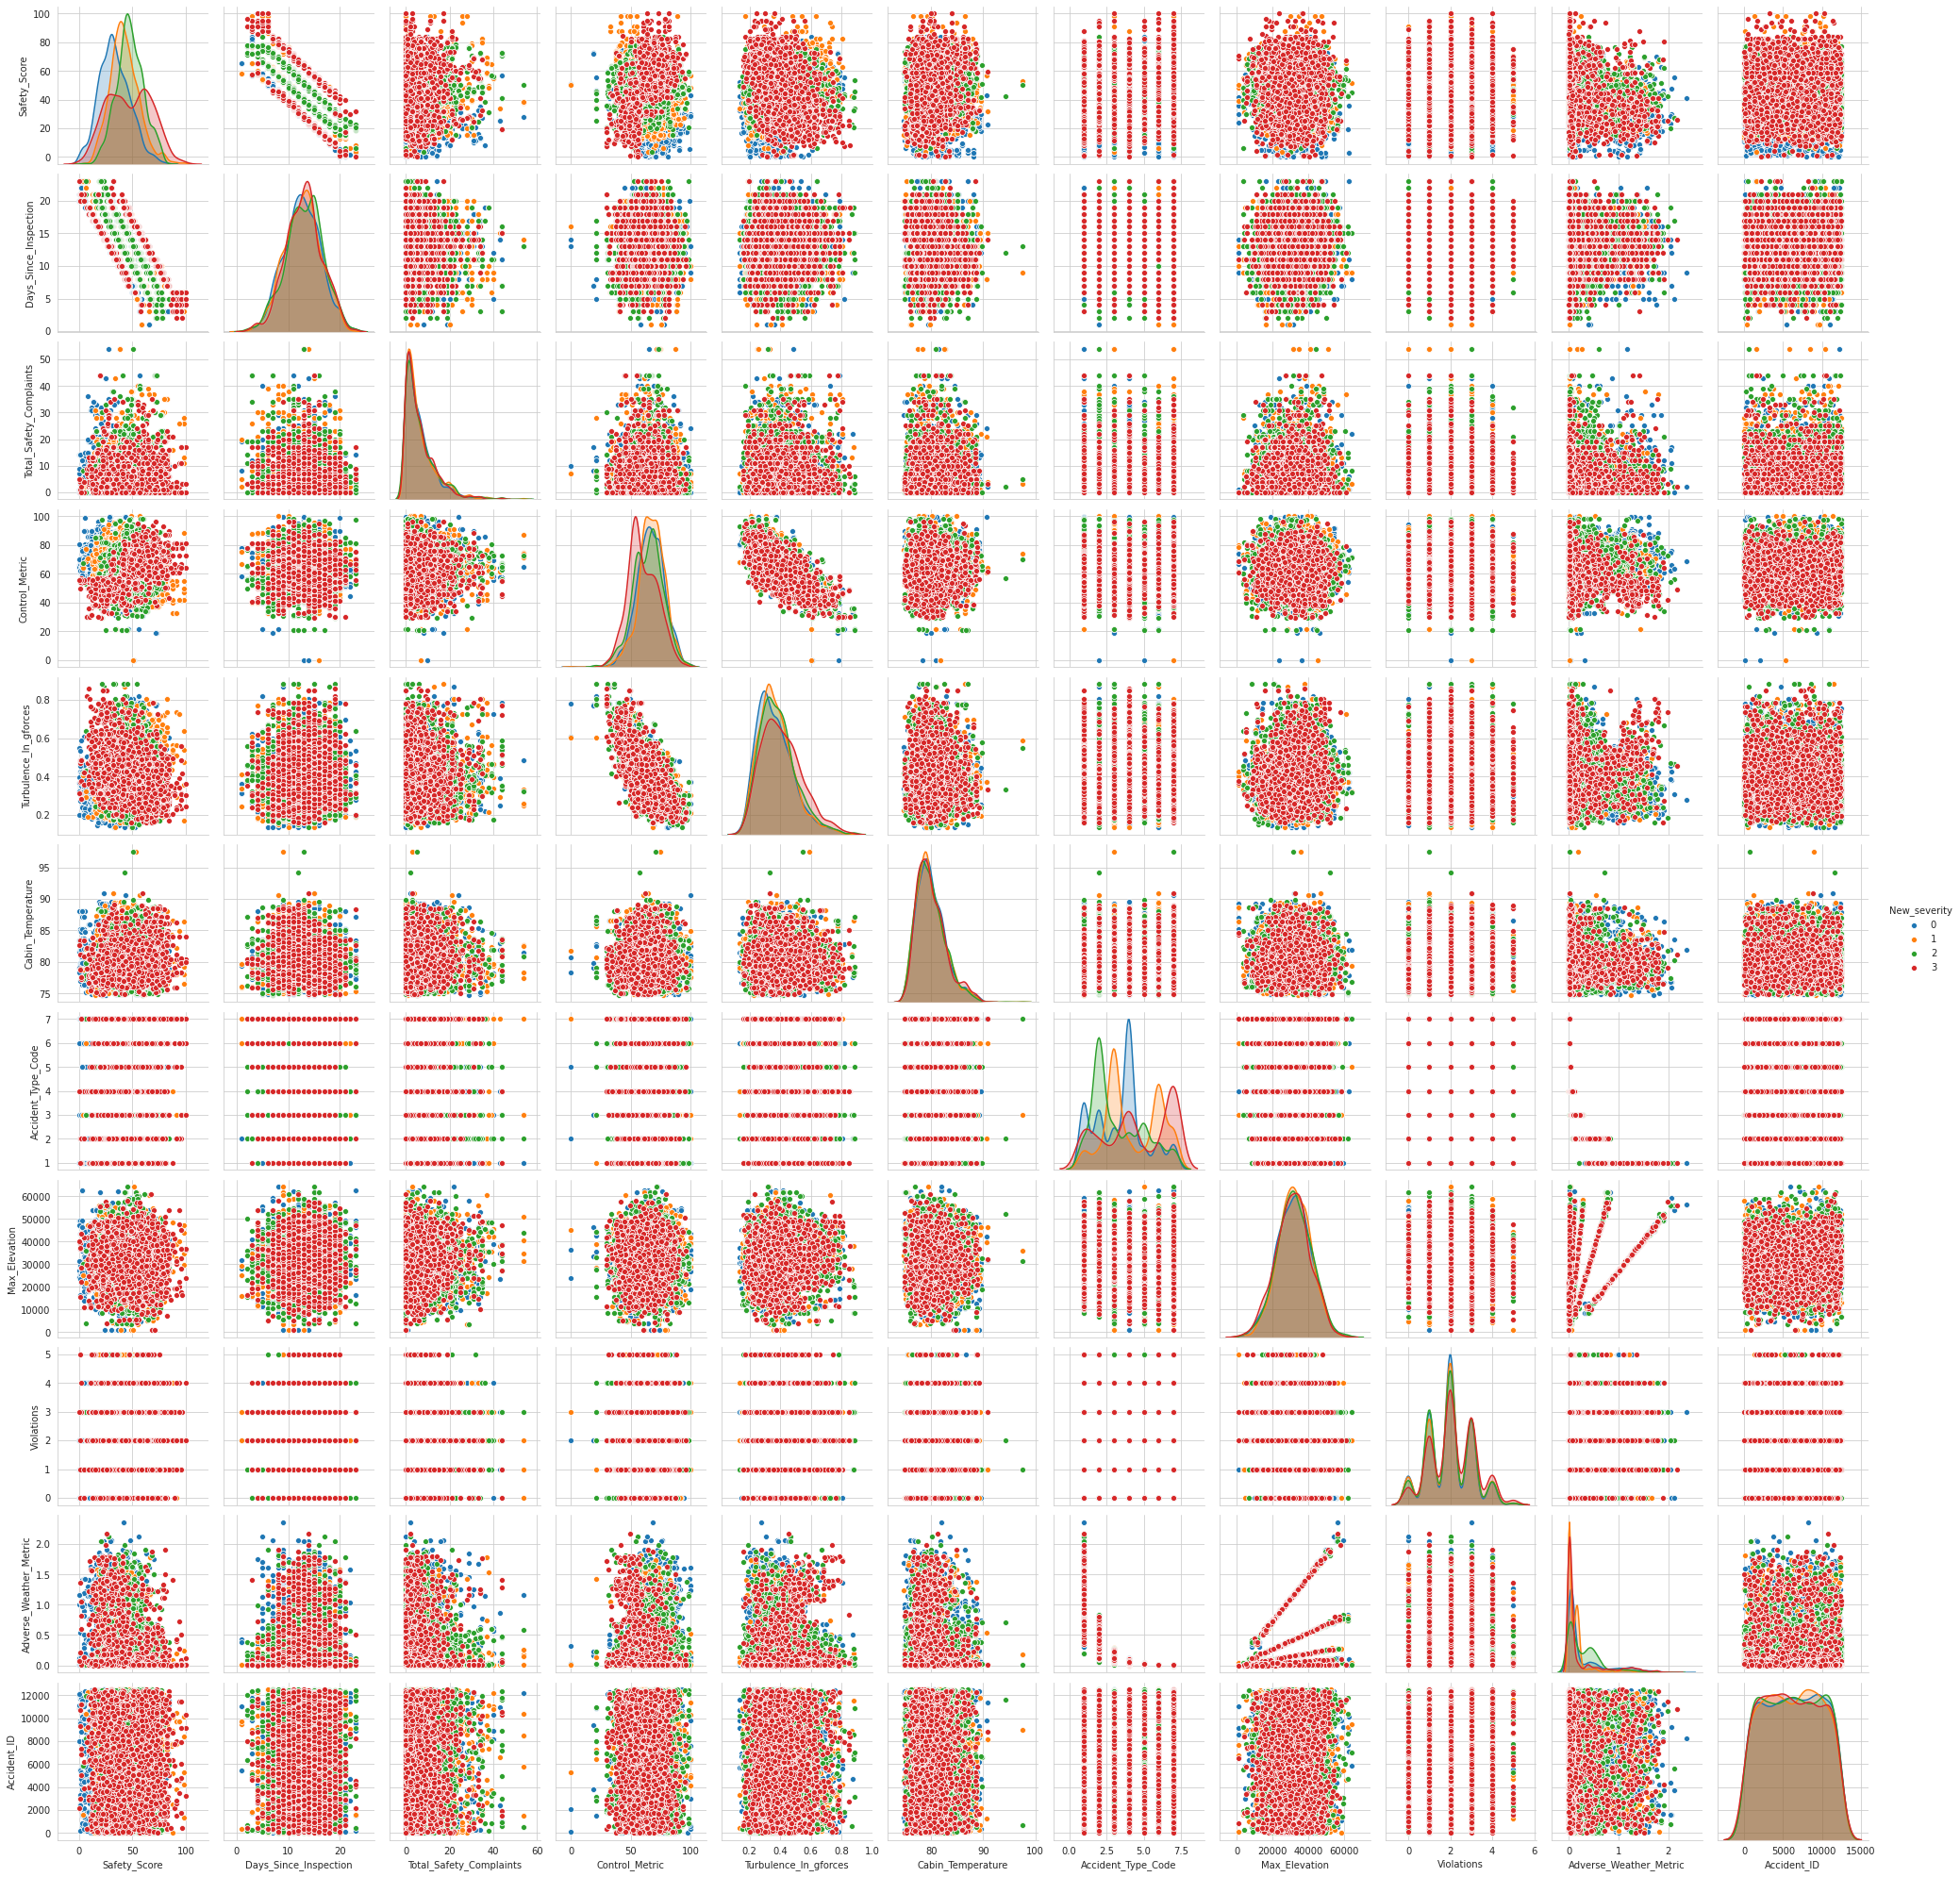

In [170]:
sns.set_style("whitegrid")                    #whitegrid:- grid view with white background
sns.pairplot(airplane_data, hue='New_severity')

**Storing the required features (independent variables) in variable x and the dependent variable in variable y**

In [171]:
x= airplane_data.iloc[:, 0:-2].values
y= airplane_data.iloc[:, -1].values

**Printing the values in x**

In [172]:
print(x)

[[4.92237443e+01 1.40000000e+01 2.20000000e+01 ... 3.13354768e+04
  3.00000000e+00 4.24352083e-01]
 [6.24657534e+01 1.00000000e+01 2.70000000e+01 ... 2.60247111e+04
  2.00000000e+00 3.52349973e-01]
 [6.30593607e+01 1.30000000e+01 1.60000000e+01 ... 3.92690539e+04
  3.00000000e+00 3.36390700e-03]
 ...
 [2.78538813e+01 1.70000000e+01 1.00000000e+00 ... 3.37719963e+04
  3.00000000e+00 1.68173043e-01]
 [5.62100457e+01 8.00000000e+00 0.00000000e+00 ... 3.98204192e+04
  2.00000000e+00 2.63809290e-02]
 [5.00000000e+01 1.30000000e+01 3.00000000e+00 ... 2.60053230e+04
  2.00000000e+00 1.70358910e-02]]


**Printing the values in y**

In [173]:
print(y)

[2 2 3 ... 1 2 0]


**Splitting the data into training set and test set**

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

**Printing the values in x_train**

In [175]:
print(x_train)

[[4.43378995e+01 1.50000000e+01 3.00000000e+00 ... 3.07014904e+04
  1.00000000e+00 4.15919627e-01]
 [3.64383562e+01 1.70000000e+01 1.00000000e+00 ... 3.89763407e+04
  0.00000000e+00 5.27487411e-01]
 [3.39726027e+01 1.10000000e+01 2.00000000e+00 ... 1.74172482e+04
  2.00000000e+00 3.20805080e-02]
 ...
 [2.18721461e+01 1.50000000e+01 9.00000000e+00 ... 4.84374401e+04
  3.00000000e+00 1.79913125e+00]
 [6.80365297e+01 1.20000000e+01 1.00000000e+00 ... 1.51800318e+04
  2.00000000e+00 1.48033400e-03]
 [3.09132420e+01 1.20000000e+01 1.00000000e+00 ... 2.31572982e+04
  2.00000000e+00 4.23891340e-02]]


**Printing the values in x_test**

In [176]:
print(x_test)

[[2.46118721e+01 2.20000000e+01 4.00000000e+00 ... 1.39455729e+04
  1.00000000e+00 1.41891100e-03]
 [4.70319635e+01 1.40000000e+01 1.30000000e+01 ... 4.98812704e+04
  2.00000000e+00 6.68862533e-01]
 [3.47945206e+01 1.10000000e+01 1.00000000e+01 ... 2.39994411e+04
  2.00000000e+00 1.20797848e-01]
 ...
 [6.53424658e+01 1.00000000e+00 8.00000000e+00 ... 2.81833231e+04
  2.00000000e+00 3.82453188e-01]
 [2.47031963e+01 1.70000000e+01 1.20000000e+01 ... 2.17205738e+04
  2.00000000e+00 1.94914600e-03]
 [3.64383562e+01 1.10000000e+01 2.00000000e+00 ... 2.69023188e+04
  2.00000000e+00 3.64323086e-01]]


**Printing the values in y_train**

In [177]:
print(y_train)

[0 2 0 ... 3 3 0]


**Printing the values in y_test**

In [178]:
print(y_test)

[2 2 0 ... 0 1 0]


**Feature Scaling (here Standardisation) of x_train and x_test using StandardScaler() class**

In [179]:
sc= StandardScaler()
x_train[:, :-2]= sc.fit_transform(x_train[:, :-2])
x_test[:, :-2]= sc.transform(x_test[:, :-2])

**Modeling the training set using LGBMClassifier()**

In [180]:
model = ltb.LGBMClassifier()
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Predicting the results (of x_test) after training the LGBM model**

In [181]:
y_pred= model.predict(x_test)

**Calculating the confusion matrix and accuracy score**

In [182]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[591  10   6  11]
 [  8 497  20   6]
 [ 10  10 485   2]
 [  7   7   3 327]]


0.95

**K-Fold Cross Validation is used to check the mean accuracy and standard deviation for 10 folds of test sets. (This is a better approach to predict the accuracy)**

In [183]:
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.16 %
Standard Deviation: 0.92 %


# **Light GBM** is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks. Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

# **Advantages of Light GBM**:
  1. Faster training speed and higher efficiency
  2. Lower memory usage
  3. Better accuracy than any other boosting algorithm
  4. Compatibility with Large Datasets
  5. Parallel learning supported

# Observing the above visualisations, I tried K-Nearest Neighbours, Decision Tree, Random Forest, XGBoost and Light GBM classifier but Light GBM gave better results in predicting Severity of Airplane Accident. I used LGBMClassifier() because the value to be predicted is categorical and therefore performing classification would be appropriate. This model worked well with the dataset and hence helped me in achieving an accuracy of 95.16 % . 